In [12]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder



In [3]:
data = pd.read_csv(r"C:\Users\USER\Desktop\Projects\Forest\data\personality_datasert.csv")
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [13]:
#scaling and splitting the independent and dependent variables

le = LabelEncoder()

data['Personality'] = le.fit_transform(data['Personality']) 
data['Stage_fear'] = le.fit_transform(data['Stage_fear'])    
data['Drained_after_socializing'] = le.fit_transform(data['Drained_after_socializing'])  



In [6]:
# splitting the feature and the target
x = data.drop('Personality', axis=1)  
y = data['Personality']               


In [7]:
# scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [8]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

# Convert to DataFrame for easier plotting
pca_df = pd.DataFrame(data=x_pca, columns=['PC1', 'PC2'])
pca_df['Personality'] = y.values


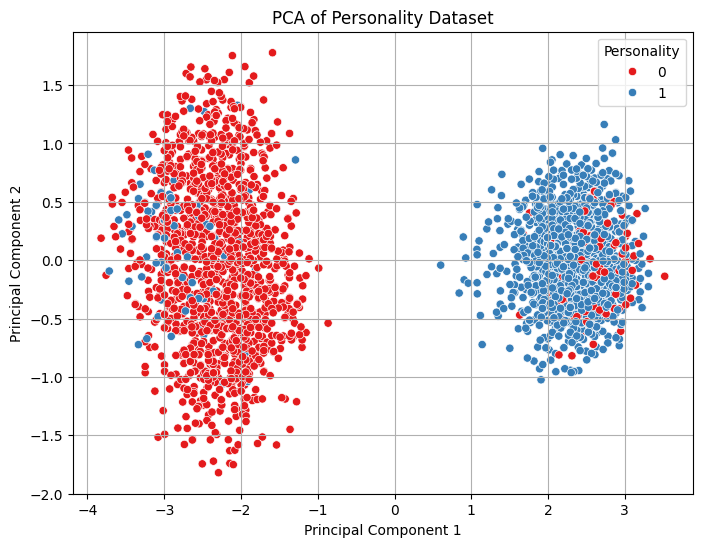

In [10]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Personality', palette='Set1')
plt.title('PCA of Personality Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [11]:
# explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Explained Variance:", sum(pca.explained_variance_ratio_))


Explained Variance Ratio: [0.8169677  0.04537115]
Total Explained Variance: 0.8623388425615575
